# Computational Physics Lecture 02-05-2025
## Applications of Monte Carlo Simulations
#### Cosmology
##### Overview
- QM fluctuations seed all large-scale structure at $t\leq 10^{-20}$
- density fluctuations grow in size
- at early times, the gravitational and electroweak/strong forces should be unified

##### 1D perturbations (Zeldovich approximation) in density of dark matter
- any accumulations of density grow with time because dark matter doesn't collide, so heat is not dissipated through shock heating / abrasion
- as density accumulates, a "caustic" of density results in highly variable velocity profiles in phase space
- Caustic represents an "overdensity" where all material is flowing into a filament (quasi-1D manifold)
- An equilibrium lattice of DM particles with any perturbations in density will form such structures with caustics, collapse, shell crossings
- In 3D, the density structure first collapses into a sheet, then a filament, then collapses on a 3rd dimension to form a node
- Nodes are known as dark matter halos, where gas and matter flow in to form galaxies and stuff
- Creates a timescale: freefall time takes time to collapse onto a point: (thousands of years for earth-sized mass, 2 bil years for Milky way density
- ONLY physics at play: gravitation (relativity) and cosmological expansion (i.e., expansion of the universe is "baked in" to the equations of motion)


#### Statistical Mechanics: Importance Sampling
##### Consider the average value calculation
- System at temperature $T$
- Fundamental stat mech problem: _calculating average values of quanitites_
- Statistical mechanics describes the system to have a probability of occupying some state $i$ with energy $E_i$, given by the Boltzmann formula
  $$ P(E_i) = \frac{e^{-\beta E_i}}{Z} $$
  where
  $$ Z = \sum_i e^{-\beta E_i} $$
  and $\beta \equiv (k_B T)^{-1}$
- We can use importance sampling to integrate over this essentially infinite domain
- choose $N$ states ($k$th state) at random and take the average value over them:
$$ \langle X \rangle \approx \frac{\sum_{k=1}^N X_k P(E_k)}{\sum_{k=1}^N P(E_k)} $$
- We let $g_i = X_i P(E_i) / w_i$ such that
  $$ \left \langle \frac{X_i P(E_i)}{w_i} \right \rangle_w = \frac{\sum_i w_i X_i P(E_i) / w_i}{\sum_i w_i} $$

- How is weighting function selected?
- Choose $P(E_i)$ as the weighting function that favors the most probable states. Recall that $P(E_i)$ is normalized such that $\sum_i w_i = 1$


## Markov Chain Monte Carlo (MCMC) method
#### Markov Chain Method
##### Consider systems where choosing a single state doesn't fully describe the system
- We can choose random states without knowing (e.g., the partition function)
- Assign a "move set" that changes the state of a single molecule only
- The change to a new state is determined by a set of transition probabilities $T_{ij}$
- If $T_{ij}$ is chosen right, the Boltzmann probability $P(E_i)$ will be recovered given enough changes
- The transition probabilities are inherently normalized $\sum_j T_{ij} = 1$
- The key in this method (for the stat mech example) is to make the partition function $Z$ vanish:
$ \frac{T_{ij}}{T_{ji}} $ is not a function of $Z$!
- The Metropolis algorithm determines whether or not to accept the change with a probability given by the change in energy of the system: if the total energy of the system decreases, always accepted; if the total energy increases, only accepted with a probability given as a function of the difference.
- when choosing a new state, every possible state must be accessible through some path. This is known as an *Ergodic set*.

##### Markov Chain Summary:
1. Choose random initial state
2. Choose a move uniformly at random from an allowed move set
3. Calculate the value of the acceptance probability $P_a$
4. Accept or reject the proposed change
5. Measure the value of the quanitity $X$ in the current state and add it to a running sum of such measurements
6. Repeat from step 2


#### Application problem
##### Consider an ideal gas
- QM states of atom (mass $m$) in a cubic box of length $L$ have three integer quantum numbers $n_i$
- Total energy $E$ is the sum of individual particle energies


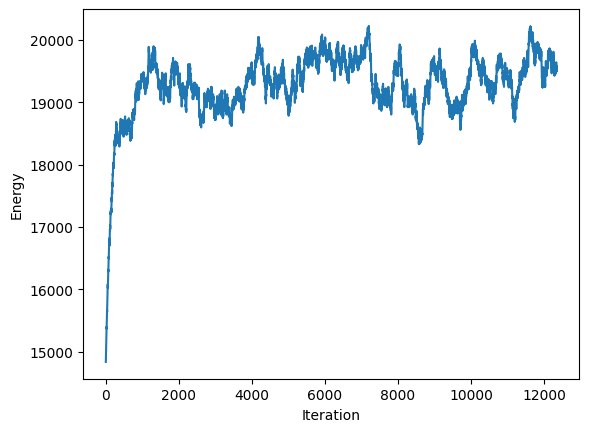

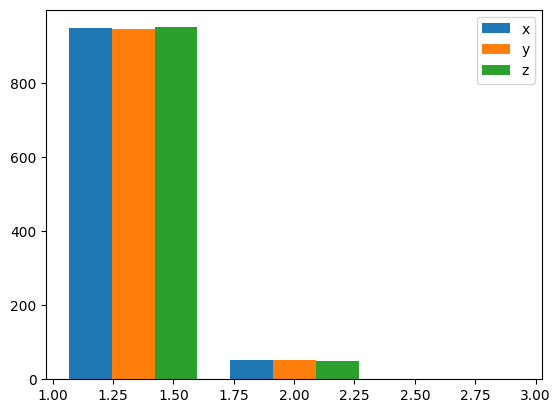

In [19]:
%matplotlib inline
from random import random,randrange
from math import exp,pi
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

T = 10.0
N = 1000
steps = 250000

# Create a 2D array to store the quantum numbers
n = np.ones([N,3],int)

beta = 1. / (T)

# Main loop
eplot = []
E = 3*N*pi*pi/2
for k in range(steps):

    # Choose the particle and the move
    # randomly select particle index from 0 - 999
    i = randrange(N)
    # randomly choose quantum number to modify
    j = randrange(3)

    p = np.random.randint(2)
    if p == 0:
        QN_modifier = -1
    else:
        QN_modifier = 1
    QN_curr = n[i,j]

    dE = (pi ** 2) * (QN_modifier * 2. * QN_curr + 1)

    if QN_curr == 1 and QN_modifier == -1:
        change_prob = 0
    elif QN_modifier == -1:
        change_prob = 1
    else:
        change_prob = np.exp(- dE / T)

    prob_exercised = np.random.random()
    if prob_exercised < change_prob:
        E += dE
        eplot.append(E)
        n[i,j] += QN_modifier

# Make some graphs
plt.plot(eplot)
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.show()

plt.hist(n, 3, label=['x','y','z'])
plt.legend(loc='best')
plt.show()